### 🌍 Exploring the Health Burden of Ambient PM₂.₅ Pollution (2010–2019)
In this section, we import the required Python libraries and load our cleaned dataset.  
We also filter the data to include:
- **Risk factor**: Ambient particulate matter pollution
- **Measure**: DALYs
- **Years**: 2010–2019
- **Causes**: Cardiovascular diseases, Respiratory diseases, Stroke
- **Countries**: The 25 selected countries

This prepares the dataset for our visual analysis.

### 📦 Importing Libraries & Setting Up Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline
daly_df = pd.read_csv("../1_datasets/cleaned_datasets/clean_gbd_health.csv")
daly_df.head()

,measure,Country,cause,Risk-Exposure-Impact,metric,Year,measure Val,upper,lower
0,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2010,0.221882,0.296283,0.128691
1,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Rate,2010,793.957477,1068.976845,455.632535
2,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2011,0.234283,0.307520,0.138086
3,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Rate,2011,835.920051,1110.785446,492.084815
4,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2012,0.249782,0.321437,0.151426


### 📊 Visualization 1: Total DALYs from Ambient PM₂.₅ by Disease and Country

This horizontal bar chart visualizes the average annual disability-adjusted life years (DALYs) lost per 100,000 people due to long-term exposure to ambient particulate matter (PM₂.₅) in each of the 25 countries from 2010 to 2019.

- Each bar represents one country.

- The length of the bar corresponds to the average yearly DALY rate over the decade.

- Countries are sorted from highest to lowest burden.

C:\Users\hp\AppData\Local\Temp\ipykernel_8452\685988845.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_country_rate, y="Country", x="measure Val", palette="viridis")


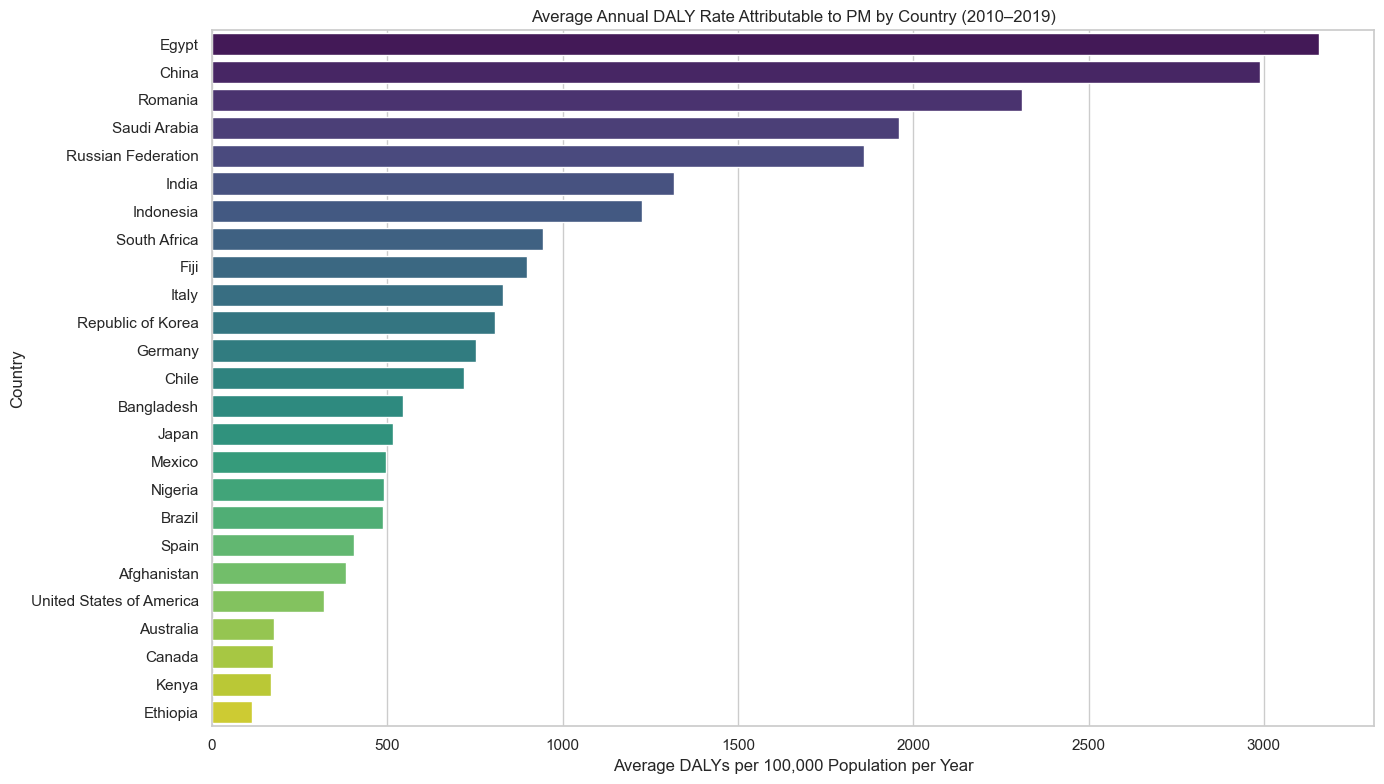

In [6]:
# filter only for DALY rates (per 100,000 people)
daly_rate_df = daly_df[daly_df["metric"] == "Rate"]

yearly_country_rate = (
    daly_rate_df.groupby(["Country", "Year"])["measure Val"].sum().reset_index()
)

# average over years to get a single value per country
avg_country_rate = (
    yearly_country_rate.groupby("Country")["measure Val"]
    .mean()
    .reset_index()
    .sort_values("measure Val", ascending=False)
)

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_country_rate, y="Country", x="measure Val", palette="viridis")

plt.title("Average Annual DALY Rate Attributable to PM by Country (2010–2019)")
plt.xlabel("Average DALYs per 100,000 Population per Year")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("figures/avg_pm_daly_by_country.png", dpi=300)
plt.show()

### 📊 Visualization 2: Breakdown by Country and Disease

Here, we create a **stacked bar plot** that shows, for each country, how the total DALYs (2010–2019) from ambient PM₂.₅ exposure are distributed among:
- Cardiovascular diseases
- Respiratory diseases
- Stroke

This visualization helps us understand which disease category contributes most to the burden in each country.

C:\Users\hp\AppData\Local\Temp\ipykernel_8452\3196496262.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_8452\3196496262.py:18: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_8452\3196496262.py:19: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig("figures/country_diseases_stacked.png", dpi=300)
C:\Users\hp\AppData\Local\Temp\ipykernel_8452\3196496262.py:19: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  plt.savefig("figures/country_diseases_stacked.png", dpi=300)
c:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8325 (\N{

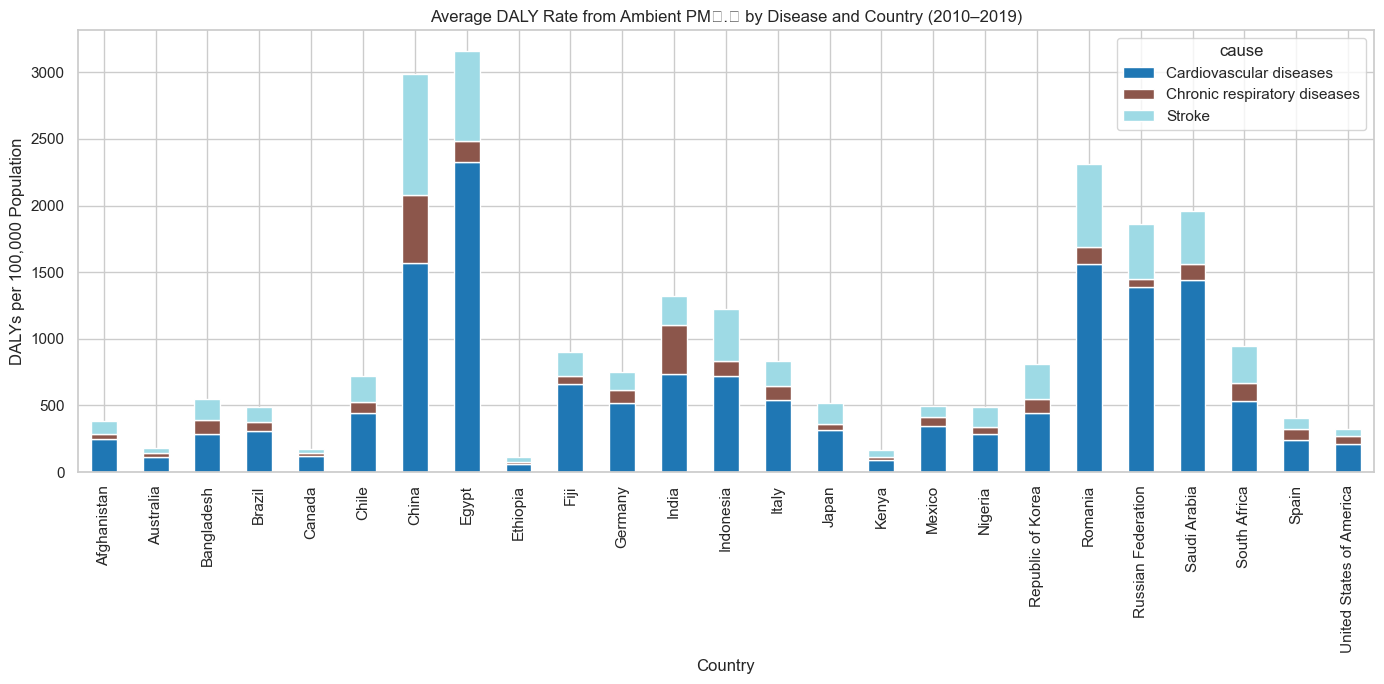

In [7]:
country_cause = (
    daly_rate_df.groupby(["Country", "cause"])["measure Val"]
    .mean()  # Again, use mean across years
    .reset_index()
)

# Pivot to prepare for stacked bar
pivot_df = country_cause.pivot(
    index="Country", columns="cause", values="measure Val"
).fillna(0)

# 4. Plot stacked bar
pivot_df.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")
plt.title("Average DALY Rate from Ambient PM₂.₅ by Disease and Country (2010–2019)")
plt.ylabel("DALYs per 100,000 Population")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("figures/country_diseases_stacked.png", dpi=300)
plt.show()

### 📊 Visualization 3: Total DALYs per Country Over Time

Finally, we create a **heatmap** showing how total DALYs attributable to ambient PM₂.₅ changed from 2010 to 2019 for each country.  
This helps us explore:
- Temporal trends in DALYs burden
- Whether certain countries experienced increases, stability, or decreases over the decade

Each cell represents the total DALYs for a country in a specific year.



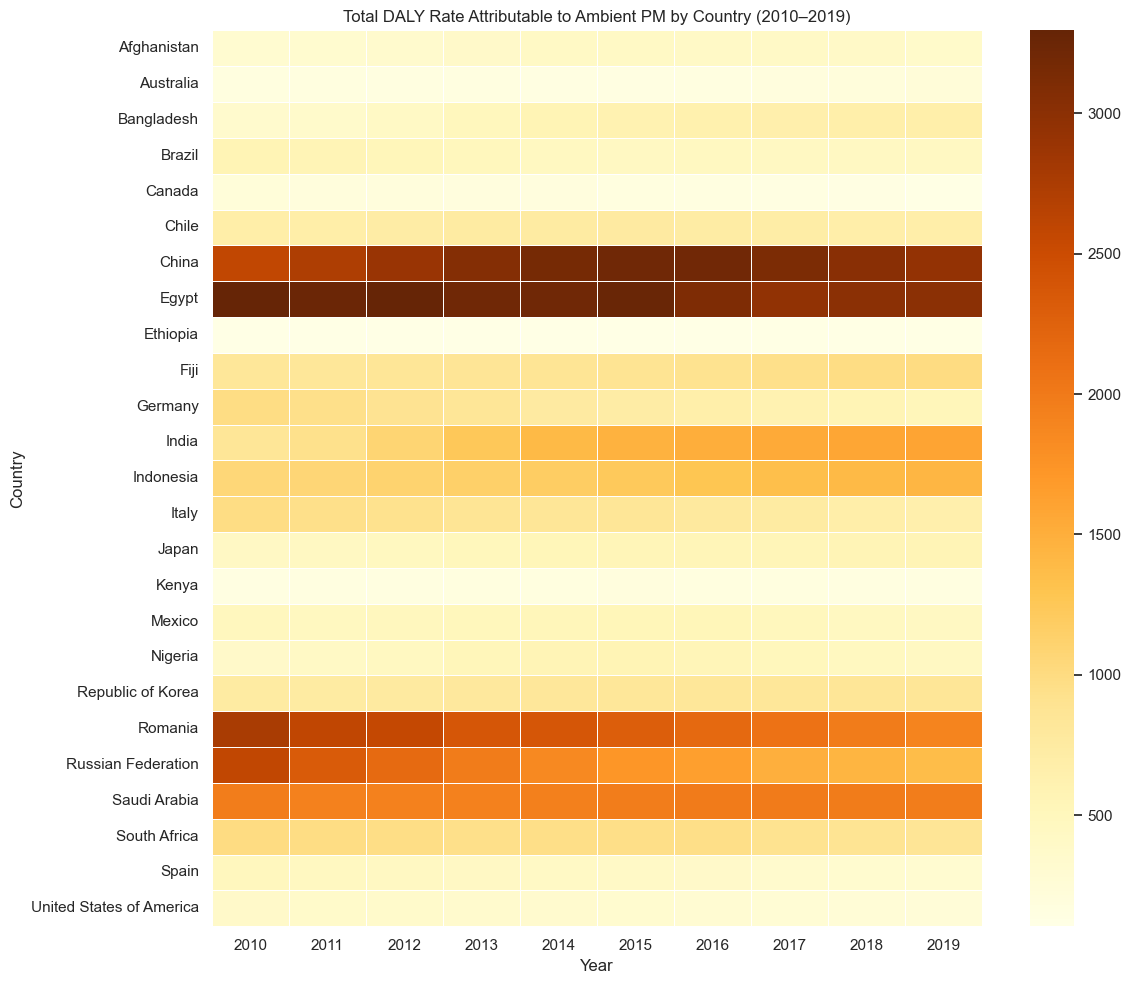

In [12]:
country_year = (
    daly_rate_df.groupby(["Country", "Year"])["measure Val"].sum().reset_index()
)

heatmap_data = country_year.pivot(index="Country", columns="Year", values="measure Val")

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlOrBr", linewidths=0.5)
plt.title("Total DALY Rate Attributable to Ambient PM by Country (2010–2019)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("figures/daly_heatmap.png", dpi=300)
plt.show()

📌 *These visualizations together provide a comprehensive exploration of the health burden from ambient PM₂.₅ across diseases, countries, and time.*